In [34]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')


In [ ]:
df_meta = getDF('meta_Musical_Instruments.json.gz')
df_reviews = getDF('reviews_Musical_Instruments.json.gz')

In [21]:
# Drop indices where price = Null
print('Number of Products: ', df_meta.shape[0])
print('Number of Null Prices: ', df_meta.price.isnull().sum())
df_meta = df_meta[~df_meta.price.isnull()]

Number of Products:  84901
Number of Null Prices:  15831


In [10]:
df_reviews.shape

(500176, 9)

In [29]:
# There are no NA values in ratings but some products don't have reviews.
# Did inner join on the two dataframes using product id
final_df = df_meta.merge(df_reviews, how='inner', on='asin')

In [57]:
n_ratings = np.arange(1, 100)
n_products = []
for n in n_ratings:
    n_products.append(np.sum(final_df.groupby(by='asin').overall.count() > n))

Text(0.5,1,'Product Count vs. # Ratings')

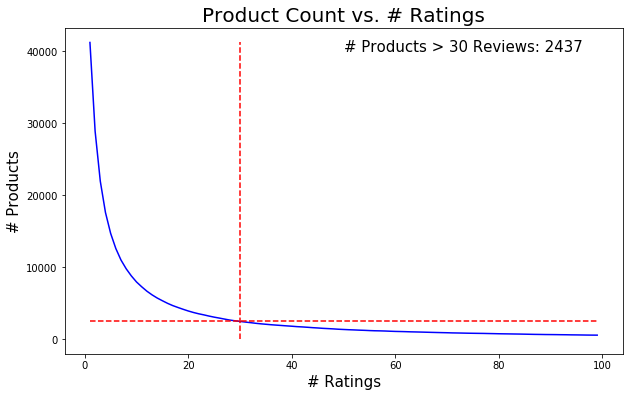

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_ratings, n_products, 'b')
ax.plot(n_ratings, [n_products[29]]*len(n_ratings),'r--')
ax.plot([30]*len(n_ratings), np.linspace(0,max(n_products),len(n_ratings)),'r--')
plt.text(50,40000, '# Products > 30 Reviews: {}'.format(
    np.sum(final_df.groupby(by='asin').overall.count() > 30)),fontsize=15)
ax.set_xlabel('# Ratings', fontsize=15)
ax.set_ylabel('# Products', fontsize=15)
ax.set_title('Product Count vs. # Ratings', fontsize=20)

In [83]:
indices = final_df.groupby(by='asin').overall.count() > 30
temp_df = final_df.groupby(by='asin').mean()

In [87]:
ff_df = temp_df.iloc[indices.values, :]

Text(0.5,1,'Product Rating vs. Price')

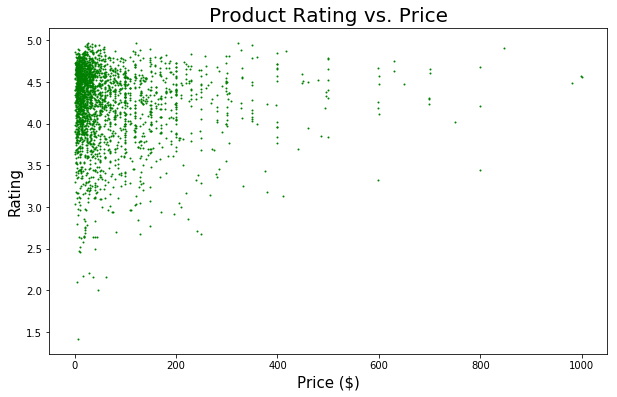

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(ff_df.price, ff_df.overall, c='g', s=1)
ax.set_xlabel('Price ($)', fontsize=15)
ax.set_ylabel('Rating', fontsize=15)
ax.set_title('Product Rating vs. Price', fontsize=20)

Text(0.5,1,'Product Rating vs. Log Price')

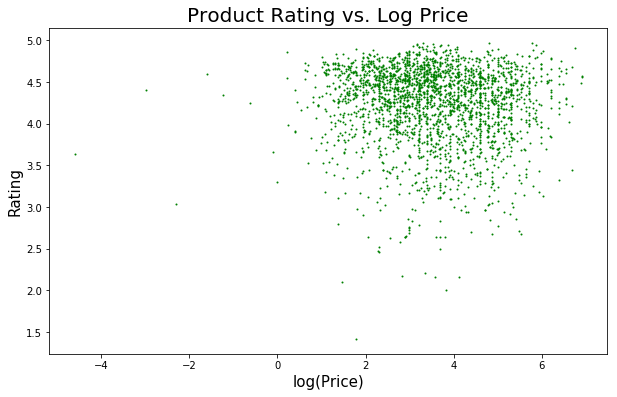

In [96]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(np.log(ff_df.price), ff_df.overall, c='g', s=1)
ax.set_xlabel('log(Price)', fontsize=15)
ax.set_ylabel('Rating', fontsize=15)
ax.set_title('Product Rating vs. Log Price', fontsize=20)

In [102]:
X_data = np.log(ff_df.price).values.reshape(-1,1)
y_data = ff_df.overall
lm = LinearRegression().fit(X_data, y_data)
y_pred = lm.predict(X_data)

Text(0.5,1,'Product Rating vs. Log Price')

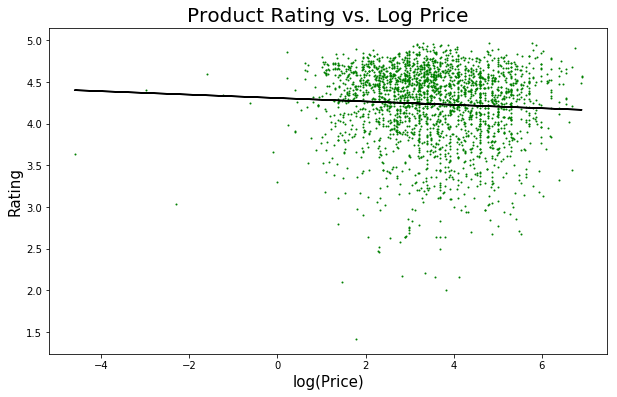

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(np.log(ff_df.price), ff_df.overall, c='g', s=1)
ax.plot(np.log(ff_df.price), y_pred, 'k-')
ax.set_xlabel('log(Price)', fontsize=15)
ax.set_ylabel('Rating', fontsize=15)
ax.set_title('Product Rating vs. Log Price', fontsize=20)


In [104]:
from sklearn.metrics import r2_score
r2_score(ff_df.overall, y_pred)

0.0032450407342208276

Text(0.5,1,'Rating Distribution')

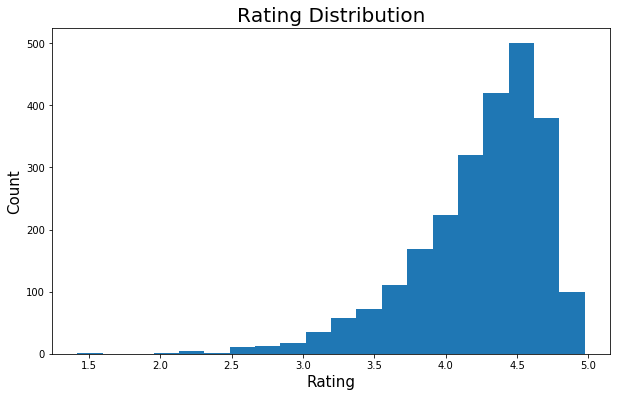

In [109]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(ff_df.overall, 20)
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Rating Distribution', fontsize=20)

In [111]:
ff_df.to_csv('musical_instruments_cleaned.csv')